<a href="https://colab.research.google.com/github/143biswajit/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **IMPORTING LIBRABARY & DATASET**

In [1]:
#Importing Librabary for python data manipulation
import pandas as pd
import numpy as np

#Import librabary for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing librabary for data type Transfermation
from datetime import datetime
import datetime as dt

# Importing Librabary for data Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

#Importing Librabary for machinelearing Regression Implementain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from vecstack import stacking

#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ALMABETTER  /HEALTH INSURANCE CROSS SELL PREDICTION-BISWAJIT GOCHHAYAT/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Making A DEEP COPY:**

In [4]:
# making a deep copy of our orginal data set
df = data.copy()

**DATA INSPECTION:**

**lets! see how our data set look like: **

In [5]:
# checking the 1st 5 lines of our data set for batter understanding.
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Data set shape**

In [6]:
# printing the shape of data shape
print('row = ',df.shape[0])
print('column = ',df.shape[1])
print("*"*50)
print('no of data = ',df.size)

row =  381109
column =  12
**************************************************
no of data =  4573308


In [7]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Column information & Data Types**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# unique values
df.nunique()


id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

**All Data Description**

In [10]:
# transposing the description of our all numerical data for better understanding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


**HANDLING MISSING VALUE:**

**Null Value Inception**

In [11]:
null = df.isna().sum().sort_values(ascending = False)
null

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# Drop the column
df.drop(['id'],inplace=True,axis = 1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:

#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=4:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

Gender has 2 unique values and those are
 Male      206089
Female    175020
Name: Gender, dtype: int64
**************************************************
Age has 66 unique value
**************************************************
Driving_License has 2 unique values and those are
 1    380297
0       812
Name: Driving_License, dtype: int64
**************************************************
Region_Code has 53 unique value
**************************************************
Previously_Insured has 2 unique values and those are
 0    206481
1    174628
Name: Previously_Insured, dtype: int64
**************************************************
Vehicle_Age has 3 unique values and those are
 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
**************************************************
Vehicle_Damage has 2 unique values and those are
 Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
**************************************************
Annu

##<b>Feature Engg:

In [15]:
##Classifying the data into categorical and numerical data
categorical_data = []
numerical_data = []
for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 4:
        categorical_data.append(col)
    else:
        numerical_data.append(col)

In [16]:
for x in categorical_data:
        ("{} : {} values".format(x, df[x].unique()))
# print('**'*50)
for x in numerical_data:
        ("{} : {} values".format(x, df[x].unique()))

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Vehicle_Age = le.fit_transform(df.Vehicle_Age)
df.Vehicle_Damage = le.fit_transform(df.Vehicle_Damage)

In [18]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


**OVERVIEW**

Dataset statistics

Number of rows:2000

Number of columns:21

Missing values:0

Missing values (%):0%

Checking Duplicate values: 0



---



---



---



# **EDA**

# **Univariant Analysis:**

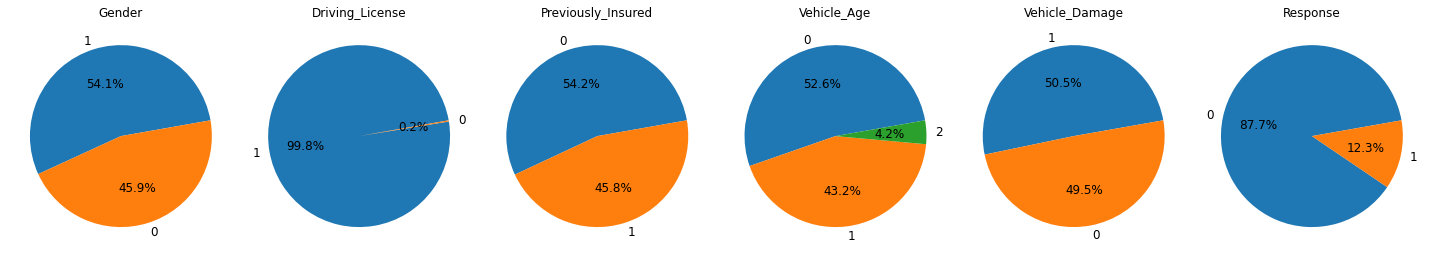

In [19]:
#making pie chart for all catagorical type varibale
fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i, c in enumerate(df[categorical_data]):
  df[c].value_counts().plot(kind = 'pie', ax=axes[i], title=c, autopct='%1.1f%%', fontsize=12,startangle=10)
  axes[i].set_ylabel('')    
  plt.tight_layout()

##<b>OBSERVATION:
                           # male-1   female-2
                           # Vehicle_Age  >2 =2  , 1-2 = 0   , <1 = 1
                           # Vehicle_Damage 1 = yes   , 0= no
1. 54.1% of male and 45.9% of female are present in cross sell data set
2. 99.8% of peoples have their own dl
3. more than 50% people have note their insurance
4. 52.6% of vichiles are in between 1 to2 years.
5. The ratio damage vichiles and non damge vichesl are aproximatels same
6. 87.6 % of peoples are not shown their intrest on response of insurance.

##<b>2.Which age of costomer have more frequent in dataset ?

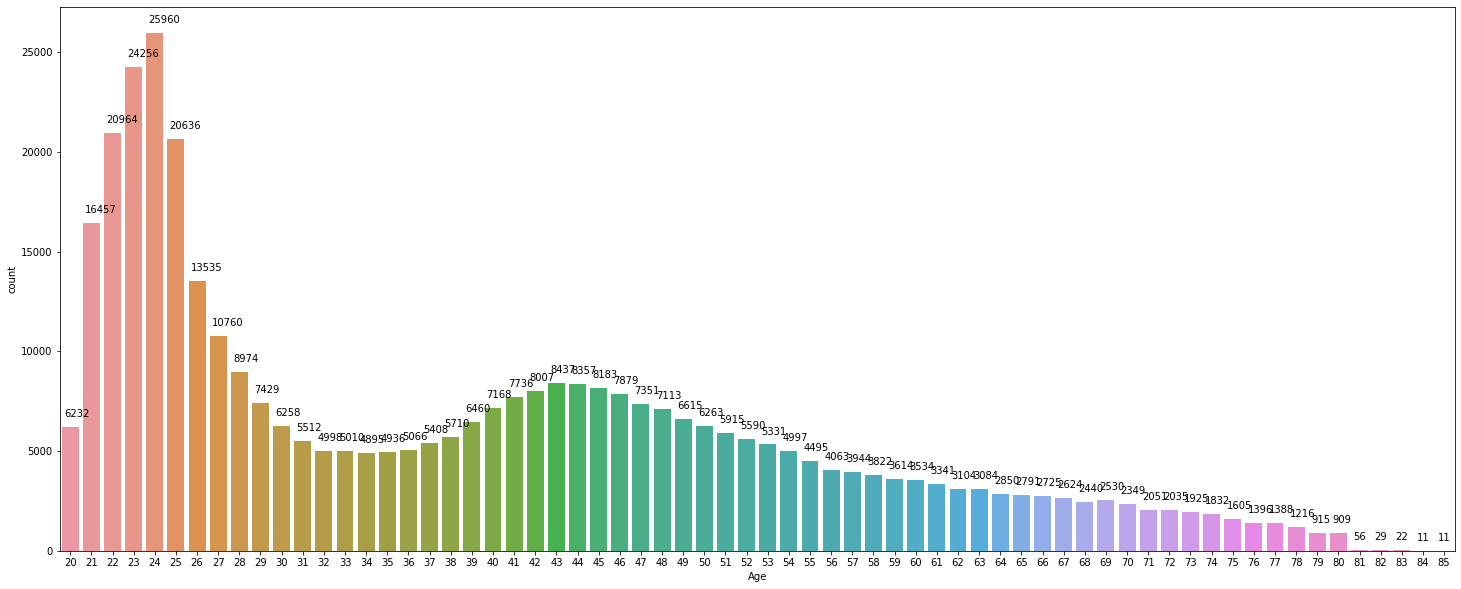

In [20]:
from seaborn.categorical import countplot
plt.figure(figsize  = (25,10))
ax = countplot(x = 'Age' ,data= df )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))



# *   21 to 26 age of costomer have more frequent in dataset.



# **which region code have high number of costomer ?**

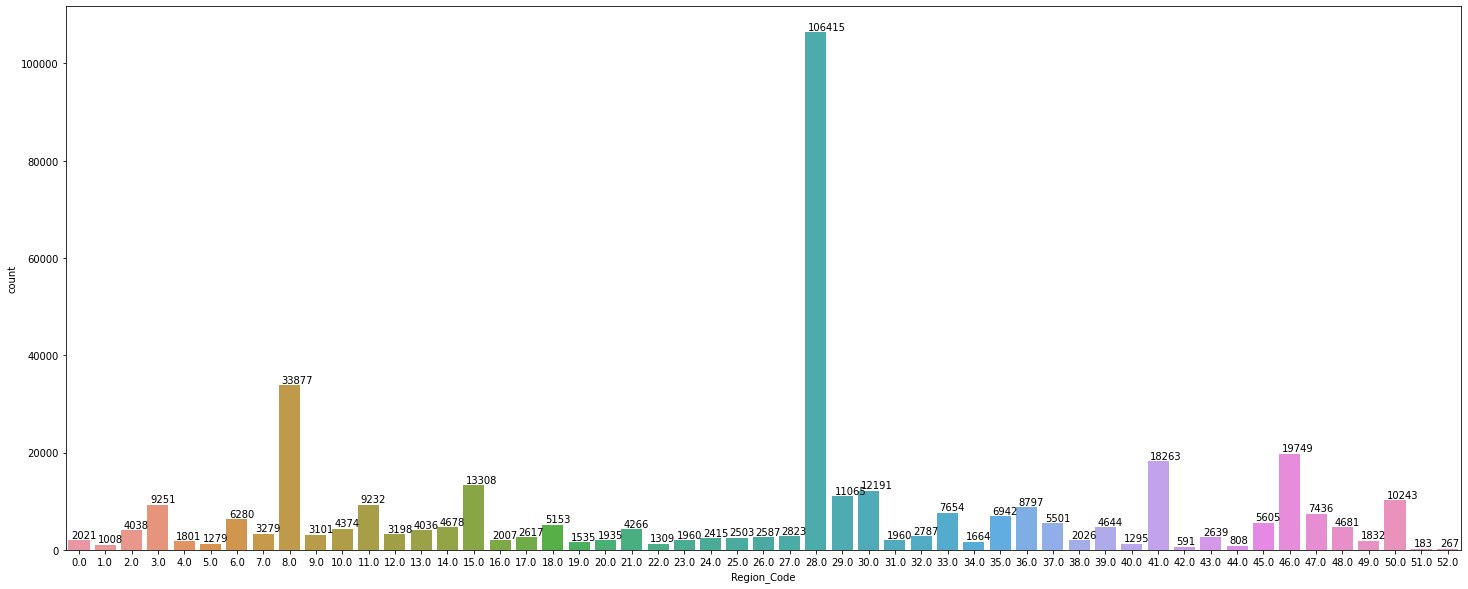

In [21]:
from seaborn.categorical import countplot
plt.figure(figsize  = (25,10))
ax = countplot(x = 'Region_Code' ,data= df )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

**Region code 106415 have high number of costomer .**



---



In [22]:
df['Policy_Sales_Channel'].nunique()


155

In [23]:
data = df.groupby(["Age"])["Gender"].agg(["value_counts"]).iloc[:5]
data

value_counts
Age Gender              
20  0               3300
    1               2932
21  0               8954
    1               7503
22  0              11767

In [24]:
#  
ab = df.groupby('Region_Code')['Previously_Insured'].count().head(10).reset_index().sort_values(by='Previously_Insured',ascending=False)
print(ab)

   Region_Code  Previously_Insured
8          8.0               33877
3          3.0                9251
6          6.0                6280
2          2.0                4038
7          7.0                3279
9          9.0                3101
0          0.0                2021
4          4.0                1801
5          5.0                1279
1          1.0                1008


Text(0, 0.5, ' Previously_Insured ')

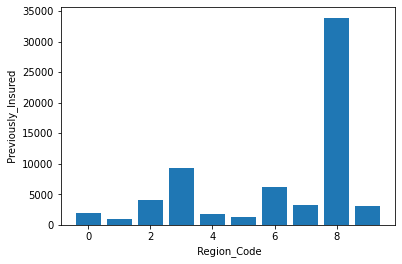

In [25]:
code = ab.loc[:,'Region_Code']
insured = ab.loc[:,'Previously_Insured']
plt.bar(code,insured)
plt.xlabel(" Region_Code")
plt.ylabel(" Previously_Insured ")

# 3. which age of vehicle age have most frequent in  previously insured ?

In [26]:
#  
ab = df.groupby('Vehicle_Age')['Previously_Insured'].count().reset_index().sort_values(by='Previously_Insured',ascending=False)
print(ab)

   Vehicle_Age  Previously_Insured
0            0              200316
1            1              164786
2            2               16007


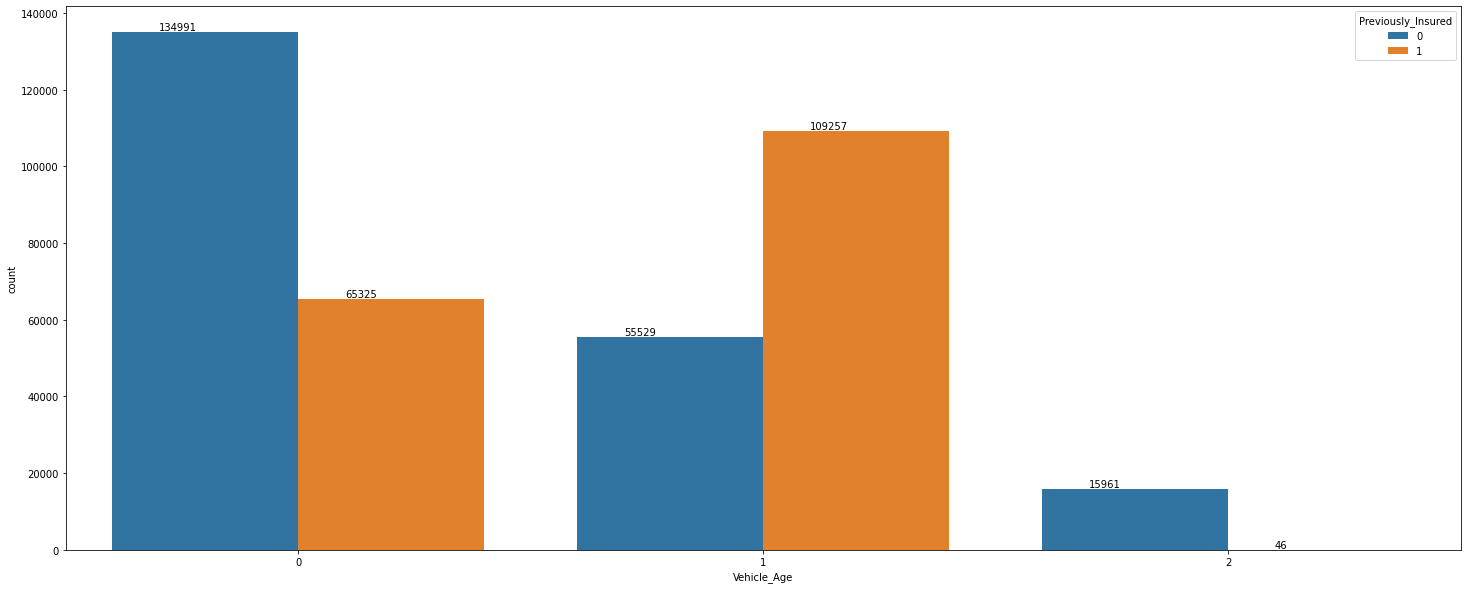

In [27]:
from seaborn.categorical import countplot
plt.figure(figsize  = (25,10))
ax = countplot(x = 'Vehicle_Age' ,data= df , hue = 'Previously_Insured')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))



#  Vechile age <=1 that is 1  have more number of previously insured. 



In [28]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# 4. which age of vehicle age  have more number of vehicle damage. ?

In [29]:
#  
ab = df.groupby('Vehicle_Age')['Vehicle_Damage'].count().reset_index().sort_values(by='Vehicle_Damage',ascending=False)
ab

,Vehicle_Age,Vehicle_Damage
0,0,200316
1,1,164786
2,2,16007


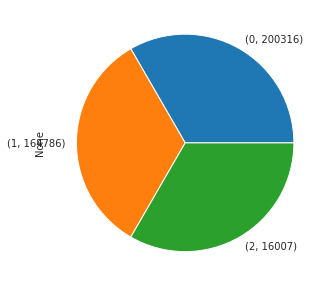

In [30]:
# Percentage of hotels present in our data set
sns.set_style('whitegrid')
plot = ab.value_counts().plot.pie(figsize=(5,5))

# Vechile age 1-2 i.e 0 have more number of vechile damage

In [31]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# 6.Which age of customer  has been associated with the company ?

In [32]:
#  
ab = df.groupby('Age')['Vintage'].count().head(10).reset_index().sort_values(by='Vintage',ascending=False)
ab

,Age,Vintage
4,24,25960
3,23,24256
2,22,20964
5,25,20636
1,21,16457
6,26,13535
7,27,10760
8,28,8974
9,29,7429
0,20,6232


Text(0, 0.5, ' Previously_Insured ')

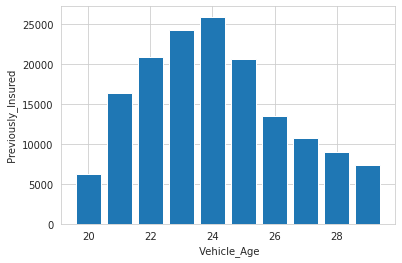

In [33]:
code = ab.loc[:,'Age']
insured = ab.loc[:,'Vintage']
plt.bar(code,insured)
plt.xlabel(" Vehicle_Age")
plt.ylabel(" Previously_Insured ")

# Age 22 to 25 age of customer have more associated with company?

In [34]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [35]:
ab=df.groupby('Region_Code')['Policy_Sales_Channel'].count().head(10).reset_index().sort_values(by='Policy_Sales_Channel',ascending=False)
ab

,Region_Code,Policy_Sales_Channel
8,8.0,33877
3,3.0,9251
6,6.0,6280
2,2.0,4038
7,7.0,3279
9,9.0,3101
0,0.0,2021
4,4.0,1801
5,5.0,1279
1,1.0,1008


In [36]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [37]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


# **Finding Outlires and Skueness.**

In [38]:
new = df.loc[:,['Age','Region_Code','Previously_Insured','Annual_Premium','Vintage','Response']]

In [39]:
new.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response
0,44,28.0,0,40454.0,217,1
1,76,3.0,0,33536.0,183,0
2,47,28.0,0,38294.0,27,1
3,21,11.0,1,28619.0,203,0
4,29,41.0,1,27496.0,39,0


In [40]:
# sns.pairplot(df, hue="Response", diag_kind="hist", markers=["o", "s"], corner=True)

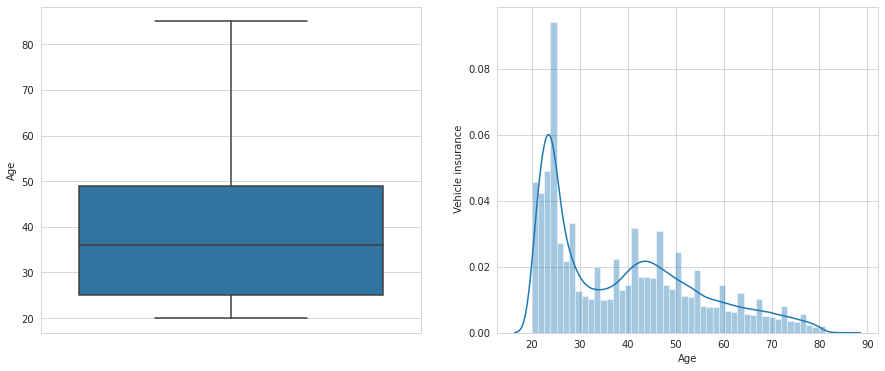

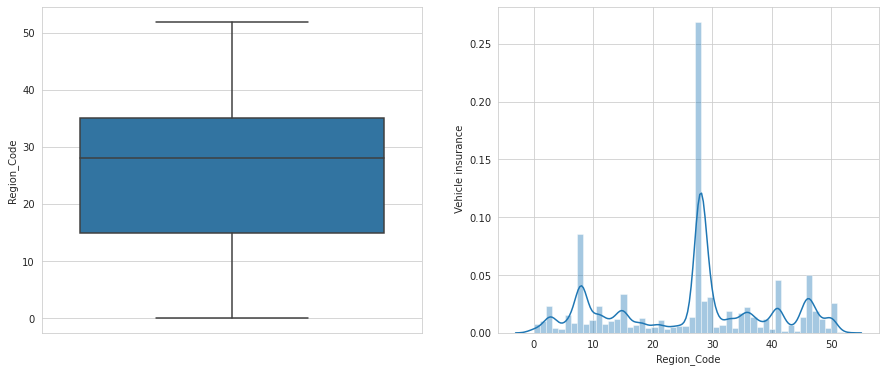

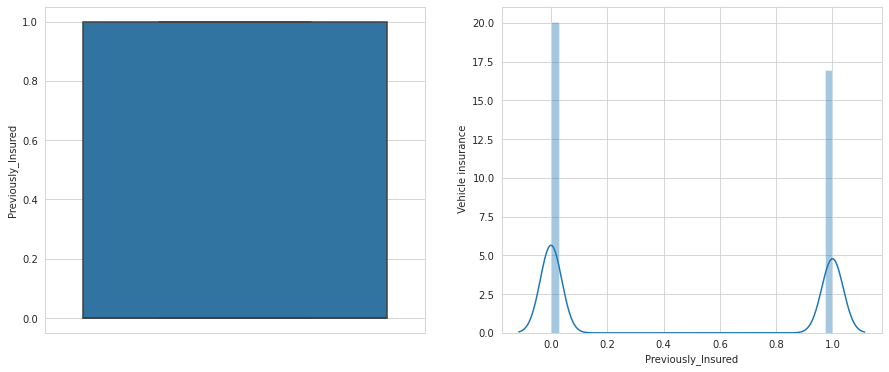

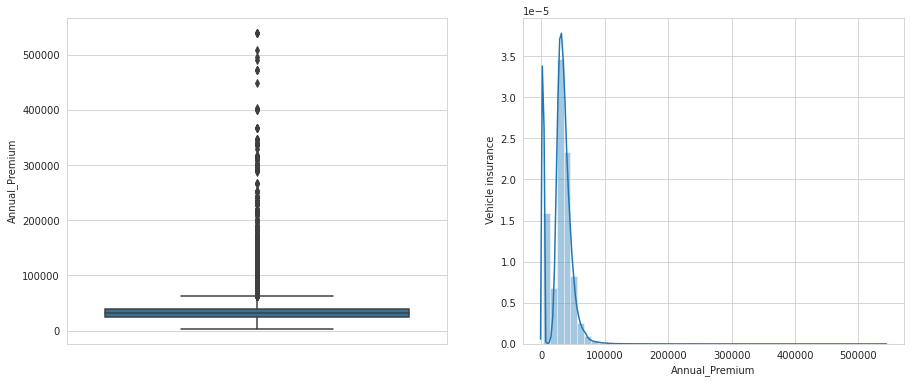

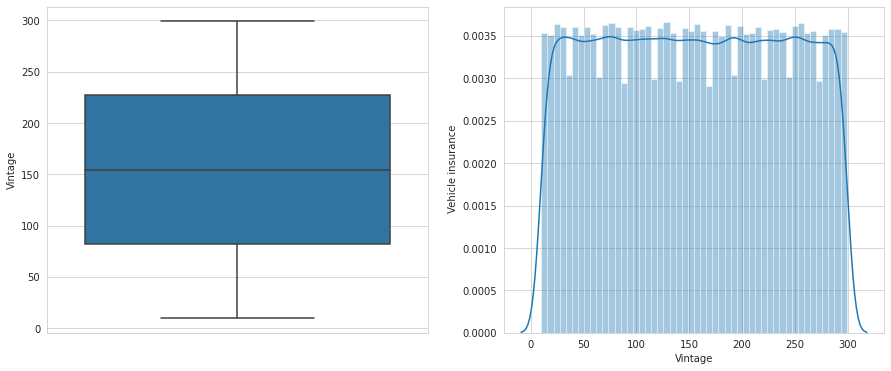

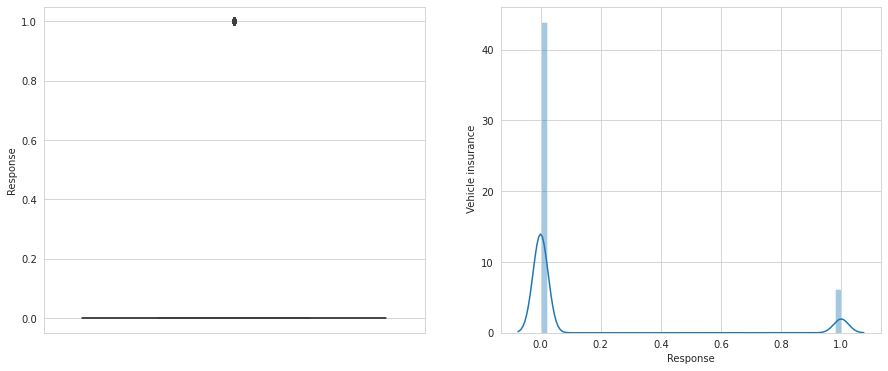

In [41]:
## ploting boxplot to visualize outlier and subplot to visualize distribution
for var in new:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=new[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(new[var])
    fig.set_ylabel(' Vehicle insurance')
    fig.set_xlabel(var)

    plt.show()

Observation : Age have positively skueed and Anula primimum have outlires.



---



---



**Finding  co-relation of column and outlire treatment**


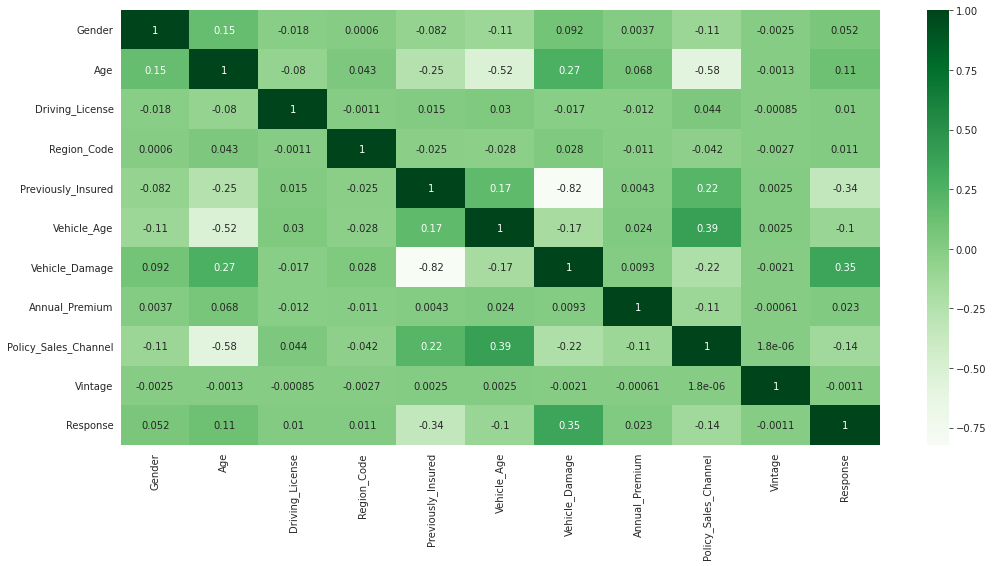

In [42]:
# #correlation map
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [43]:
def detect_outlier(df,features):
    outlier_indices = []

    '''this function helps ud to finding outlier'''
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    return outlier_indices

In [44]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [45]:
df.loc[detect_outlier(df,["Response"])]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
7,0,56,1,28.0,0,0,1,32031.0,26.0,72,1
10,0,47,1,35.0,0,0,1,47576.0,124.0,46,1
15,1,37,1,6.0,0,0,1,2630.0,156.0,147,1
...,...,...,...,...,...,...,...,...,...,...,...
381057,1,40,1,46.0,0,0,1,27508.0,26.0,189,1
381061,0,41,1,28.0,0,0,1,37377.0,124.0,99,1
381073,0,46,1,28.0,0,0,1,34741.0,124.0,167,1
381075,0,61,1,28.0,0,0,1,43875.0,26.0,139,1


In [46]:
# calculate the first quartile
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

Gender                      1.0
Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Vehicle_Age                 1.0
Vehicle_Damage              1.0
Annual_Premium          14995.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64


In [47]:
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [48]:
df_outliers.shape

(56198, 11)

In [49]:
X = df.drop('Response',axis=1)
y = df['Response']

In [50]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

# **Train Test split**

In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 5)
print(f'the shape of X : {X.shape}')
print(f'the shape of y :{y.shape}') 
print(f'the shape of X_train : {X_train.shape}')
print(f'the shape of y_train : {X_test.shape}')

the shape of X : (381109, 10)
the shape of y :(381109,)
the shape of X_train : (304887, 10)
the shape of y_train : (76222, 10)


In [52]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
74161,1,52,1,44.0,1,0,0,40710.0,26.0,168
107315,1,31,1,37.0,0,1,1,34332.0,152.0,272
140508,0,23,1,44.0,1,1,0,39213.0,152.0,168
167354,1,51,1,28.0,0,0,1,38668.0,124.0,55
257640,0,24,1,10.0,1,1,0,31369.0,152.0,150


In [53]:
y_train.head()

74161     0
107315    0
140508    0
167354    0
257640    0
Name: Response, dtype: int64



---



---



# **LOGISTIC REGRESSION**

In [54]:
logreg = LogisticRegression()

In [55]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
y_train.unique()
confusion_matrix(y_test, y_pred)

array([[65648,  1324],
       [ 8777,   473]])

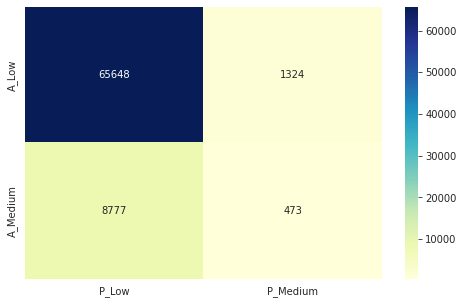

In [58]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [59]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66972
           1       0.26      0.05      0.09      9250

    accuracy                           0.87     76222
   macro avg       0.57      0.52      0.51     76222
weighted avg       0.81      0.87      0.83     76222



In [60]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [61]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [62]:
multiclass_roc_auc_score(y_test, y_pred)

0.5156828396215604

In [63]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.515683,0.806968,0.867479,0.826268,0.867479,0.865248


# **Logistic Regression with SGD:**

In [64]:
# instantiate the 'SGDClassifier' to bild model using SGD
logreg_with_SGD = SGDClassifier()

# fit the model on training data
logreg_with_SGD.fit(X_train, y_train)

# use predict() to predict the values
logreg_with_SGD_pred = logreg_with_SGD.predict(X_test)

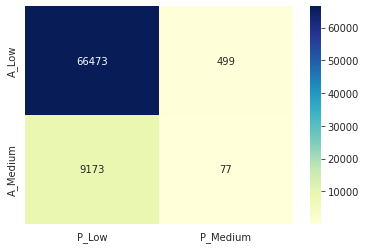

In [65]:
# compute the confusion matrix
cm = confusion_matrix(y_test, logreg_with_SGD_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [66]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,logreg_with_SGD_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66972
           1       0.13      0.01      0.02      9250

    accuracy                           0.87     76222
   macro avg       0.51      0.50      0.47     76222
weighted avg       0.79      0.87      0.82     76222



In [67]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Logistic_regression_SGD_metrics = pd.Series({'Model': "Logistic regression with SGD",
                     'AUC Score' : multiclass_roc_auc_score(y_test, logreg_with_SGD_pred),
                 'Precision Score': metrics.precision_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, logreg_with_SGD_pred),
                 'Train Accuracy': logreg_with_SGD.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.515683,0.806968,0.867479,0.826268,0.867479,0.865248
1,Logistic regression with SGD,0.500437,0.788321,0.873108,0.820958,0.873108,0.870949




---



---




# **Decision Tree:**

In [68]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

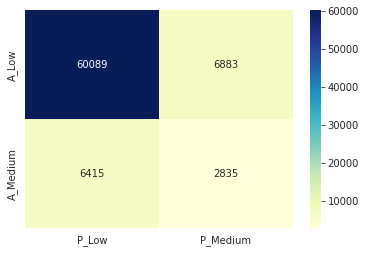

In [69]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [70]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66972
           1       0.29      0.31      0.30      9250

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



In [71]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.515683,0.806968,0.867479,0.826268,0.867479,0.865248
1,Logistic regression with SGD,0.500437,0.788321,0.873108,0.820958,0.873108,0.870949
2,Decision Tree,0.601856,0.829292,0.825536,0.827382,0.825536,0.999872




---



---



# **Decision Tree using Grid Search CV**:

In [74]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(1,5,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [76]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40])})

In [77]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 10}

In [78]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=2,
 max_leaf_nodes=4,
 min_samples_leaf=10)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

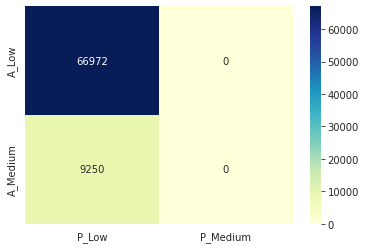

In [80]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [81]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66972
           1       0.00      0.00      0.00      9250

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



In [82]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.515683,0.806968,0.867479,0.826268,0.867479,0.865248
1,Logistic regression with SGD,0.500437,0.788321,0.873108,0.820958,0.873108,0.870949
2,Decision Tree,0.601856,0.829292,0.825536,0.827382,0.825536,0.999872
3,Decision Tree with Grid Search,0.500000,0.772015,0.878644,0.821886,0.878644,0.877135



# **Random Forest:**

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

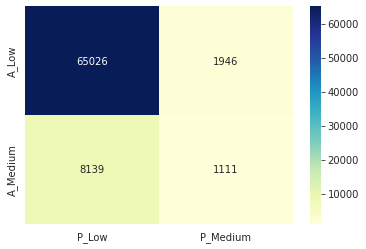

In [85]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [86]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66972
           1       0.36      0.12      0.18      9250

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.83      0.87      0.84     76222



In [87]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.515683,0.806968,0.867479,0.826268,0.867479,0.865248
1,Logistic regression with SGD,0.500437,0.788321,0.873108,0.820958,0.873108,0.870949
2,Decision Tree,0.601856,0.829292,0.825536,0.827382,0.825536,0.999872
3,Decision Tree with Grid Search,0.500000,0.772015,0.878644,0.821886,0.878644,0.877135
4,Random Forest,0.545526,0.825006,0.867689,0.837323,0.867689,0.999852




---



---





# **KNN:**

In [88]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [89]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [90]:
param_grid_knn = {'n_neighbors':np.arange(1,15,2), 'p':[1,2,3]}

In [91]:
# # instantiate the KNN classifier
# knn_Gridsearch = KNeighborsClassifier()

# # use 'GridSearchCV' to obtain the best value of K
# knn_Gridsearch_CV = GridSearchCV(knn_Gridsearch, param_grid_knn, cv=5)

# # fit the model
# knn_Gridsearch_CV.fit(X_train_scale,y_train)

In [92]:
# knn_Gridsearch_CV.best_params_

In [93]:
# # as K = 13, is a best pick for K, build a KNN model with K = 7
# knn = KNeighborsClassifier(n_neighbors=13,p=1)

# #Fit the model
# knn.fit(X_train_scale,y_train)

# knn_pred = knn.predict(X_test_scale)

In [94]:
# # compute the confusion matrix
# cm = confusion_matrix(y_test, knn_pred)

# # label the confusion matrix  
# conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium'],index=['A_Low','A_Medium'])

# # set size of the plot
# #plt.figure(figsize = (8,5))

# # plot a heatmap
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()

In [95]:
# # accuracy measures obtained by classification_report()
# result = classification_report(y_test,knn_pred)

# # print the result
# print(result)

In [96]:
# # create the result table for all accuracy scores
# # Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# # compiling the required information
# knn_metrics = pd.Series({'Model': "KNN",
#                      'AUC Score' : multiclass_roc_auc_score(y_test, knn_pred),
#                  'Precision Score': metrics.precision_score(y_test, knn_pred,average='weighted'),
#                  'Recall Score': metrics.recall_score(y_test, knn_pred,average='weighted'),
#                  'f1-score':metrics.f1_score(y_test, knn_pred,average='weighted'),
#                  'Accuracy Score': metrics.accuracy_score(y_test, knn_pred),
#                  'Train Accuracy': knn.score(X_train,y_train)})


# # appending our result table
# result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# # view the result table
# result_tabulation.rename(columns={'Accuracy Score':'Test Accuracy'},inplace=True)
# result_tabulation



---



---




# **FEATURE SELACTION FOR BATTER MODEL:**

Text(0.5, 1.0, 'Visualizing Important Features')

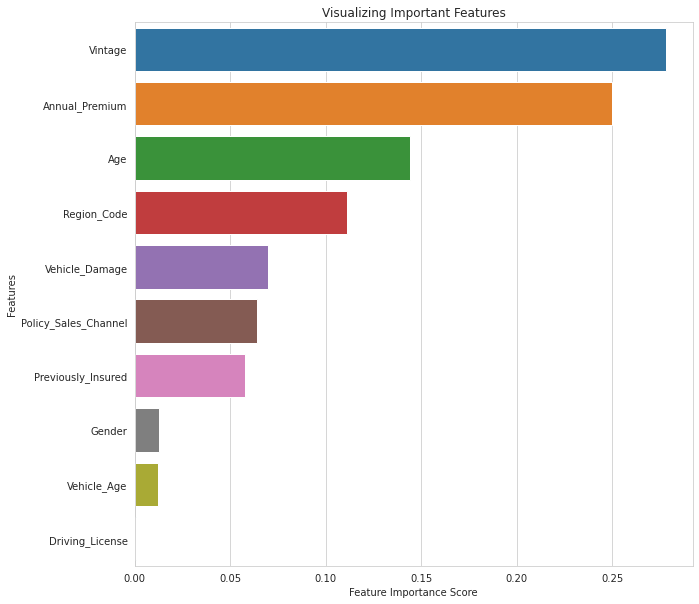

In [97]:
feature_imp = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [98]:
rf_f = feature_imp[feature_imp>0.027].index.tolist()
rf_f

['Vintage',
 'Annual_Premium',
 'Age',
 'Region_Code',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Previously_Insured']

In [99]:
sel_chi2 = SelectKBest(chi2, k=8)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[ True  True False  True  True  True  True  True  True False]


In [100]:
temp = pd.Series(sel_chi2.get_support(),index = X.columns)
selected_features_kbest = temp[temp==True].index
kbest_f = selected_features_kbest.tolist()
print(selected_features_kbest)

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel'],
      dtype='object')


In [105]:
d = {'random forest': sorted(rf_f), 'kbest': sorted(kbest_f)}
feat_sel = pd.DataFrame(d)
feat_sel

ValueError: ignored